EXERCISE 3.1

In [47]:
import numpy as np 
from scipy.linalg import eigh
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt

In [52]:
def laplacian_square(n):
    N = n * n  
    laplacian = np.zeros((N, N)) 
    for i in range(N): # walk over matrix one row at the time 
        laplacian[i, i] = -4  # diagonals always 4 
        if i - 1 >= 0:  # checks for left neigbour only when its bigger than 0 
            laplacian[i, i - 1] = 1 # left neighbour -1
        if i + 1 < N and (i % n) != (n - 1):   # second condition prevends that its not on right edge
            laplacian[i, i + 1] = 1
        if i - n >= 0: # i-n >0 means that the first 4 points in grid dont have a top neighbour so we dont use them
            laplacian[i, i - n] = 1 # point 5 has neighbour at y = 1
        if i + n < N:  # not bigger than 16 to prevent bottom
            laplacian[i, i + n] = 1 # point 5 has neigbour 9 below as n
    return laplacian
print(laplacian_square(4))

[[-4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4. 

In [11]:
def laplacian_rectangle(n,m):
    # n  = 2 , m = 2*n
    N = n * m 
    laplacian = np.zeros((N, N)) 
    for i in range(N): 
        laplacian[i, i] = -4
        if i - 1 >= 0: 
            laplacian[i, i - 1] = 1 
        if i + 1 < N and (i % n) != (n - 1):   
            laplacian[i, i + 1] = 1
        if i - m >= 0:
            laplacian[i, i - m] = 1 
        if i + m < N:  
            laplacian[i, i + m] = 1 
    return laplacian
print(laplacian_rectangle(3,6))

[[-4.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -4.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -4.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  1. -4.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  1. -4.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  1. -4.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  1. -4.  1.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  1. -4.  1.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1. -4.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1. -4.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.

In [12]:
def laplacian_circle(n,L):
    N = n * n  
    laplacian = np.zeros((N, N)) 
    R = L/2
    points = []
    
    x = np.linspace(-L/2, L/2, n)
    y = np.linspace(-L/2, L/2, n)
    
    for i in range(n):
        for j in range(n):
            if x[i]**2 + y[j]**2 <= R**2:
                #points.append((i, j))
                index = i * n + j  #convert point to index so (2,3) is index 11
                points.append(index)
    print(points)
    print(len(points))
    
    for i in range(N):  
        if i in points:  
            laplacian[i, i] = -4  

        if i - 1 in points and (i % n) != 0:  
            laplacian[i, i - 1] = 1  
        if i + 1 in points :  
            laplacian[i, i + 1] = 1  
        if i - n in points:  
            laplacian[i, i - n] = 1  
        if i + n in points:  
            laplacian[i, i + n] = 1  

    return laplacian
print(laplacian_circle(5,1))

[2, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 18, 22]
13
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -4.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -4.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  1. -4.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -4.  0.  0.  0.  0.  1.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 

Question B

In [26]:
# square domain: 
# the matrix is symmetric, hence we use scipy.linalg.eigh()
# IS ER EEN CONDITIE VOOR DE GRID SIZE?? ZE ZEGGEN ALLEEN L=1

square_100 = laplacian_square(100) #s.t. for L=1, h=0.01

In [27]:
eigenvalue_square_100, eigenvector_square_100 = eigh(square_100)

C:\Users\wempe\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\wempe\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


IndexError: index 11 is out of bounds for axis 0 with size 6

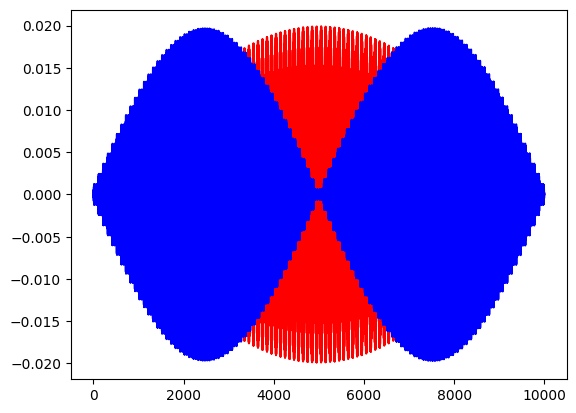

In [50]:
index_of_smallest_eigenvalue = np.argsort(eigenvalue_square_100)[:12]
plt.figure()
plt.plot(eigenvector_square_100[:,index_of_smallest_eigenvalue[0]], label = f' (λ={eigenvalue_square_100[index_of_smallest_eigenvalue[0]]:.2f})',color = 'red')
plt.plot(eigenvector_square_100[:,index_of_smallest_eigenvalue[3]], label = f' (λ={eigenvalue_square_100[index_of_smallest_eigenvalue[3]]:.2f})',color = 'blue')
#plt.plot(eigenvector_square_100[:,index_of_smallest_eigenvalue[7]], label = f' (λ={eigenvalue_square_100[index_of_smallest_eigenvalue[7]]:.2f})',color = 'green')
plt.plot(eigenvector_square_100[:,index_of_smallest_eigenvalue[11]], label = f' (λ={eigenvalue_square_100[index_of_smallest_eigenvalue[11]]:.2f})',color = 'yellow')

plt.legend()
plt.xlabel('Index')
plt.ylabel('Eigenvectors corresponding to smallest λ')
plt.title('Eigenvectors')
plt.show()


Question C

In [49]:
eigenvalue_square_100, eigenvector_square_100 = eigs(square_100)

In [51]:
eigenvalue_square_100


array([-7.99804569+0.j, -7.9952392 +0.j, -7.99514434+0.j, -7.99233771+0.j,
       -7.9903119 +0.j, -7.99015657+0.j])